In [1]:
# all imports
from os import times
import tweepy
from textblob import TextBlob
import pandas as pd
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
 

## **TWEET EXTRACTION**

In [2]:
CONSUMER_KEY='8V4toASRqwVLXtP7yp1pKJICv'
CONSUMER_SECRET='TDEVVQ5LBgXGzwXZKne2OAgNapIAeBSCREhLyDwvfZs8RaAO4D'
ACCESS_KEY='1312978936037552128-NZ0WXcyfuNzJ98AbxLkuts5TVklx9h'
ACCESS_SECRET='qJZ53s1rx6n0UUmIkjxuyXWKigF237qLCxLdPGONOjkcx'
auth=tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY,ACCESS_SECRET)
auth.secure=True
api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [3]:
def extraction():

    searchQuery = 'Covid 19'
    count = 1
    try:
        # Creation of query method using parameters
        tweets = tweepy.Cursor(api.search,q=searchQuery).items(count)
        
        # Pulling information from tweets iterable object
        tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
    
    # Creation of dataframe from tweets list
    # Add or remove columns as you remove tweet information
        tweets_df = pd.DataFrame(tweets_list)
    
    except BaseException as e:
        print('failed on_status,',str(e))
        times.sleep(3)
        
    q=searchQuery
    tweetsPerQry=1
    fName='newFile.txt'
    sinceId=None
    max_id= -1
    maxTweets=1
    tweetCount=0
    print("downloading".format(maxTweets))
    with open(fName ,'w') as f:
        while tweetCount<maxTweets:
            tweets=[]
            try:
                if(max_id<=0):
                    if(not sinceId):
                        new_tweets=api.search(q=q,lang="en",count=tweetsPerQry,tweet_mode='extended')
                    else:
                        new_tweets=api.search(q=q,lang="en",count=tweetsPerQry,since_id=sinceId,tweet_mode='extended')
                else:
                    if(not sinceId):
                        new_tweets=api.search(q=q,lang="en",count=tweetsPerQry,max_id=str(max_id-1),tweet_mode='extended')
                    else:
                        new_tweets=api.search(q=q,lang="en",count=tweetsPerQry,max_id=str(max_id-1),since_id=sinceId,tweet_mode='extended')
        
                if not new_tweets:
                    print("no more tweets found")
                    break
                for tweet in new_tweets:
                    f.write(str(tweet.full_text.replace('\n','').encode("utf-8"))+"\n")
        
                tweetCount+=len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id=new_tweets[-1].id
        
            except tweepy.TweepError as e:
                print("Some error: "+str(e))
                break
        
    print ("Downloaded {0} tweets , saved to {1}".format(tweetCount,fName)) 


    f_1 = open("newFile.txt", "r")
    print(" The tweet is: ")
    read_tweet = f_1.read() 
    print(read_tweet)                                          

    return read_tweet
    
    

# **`PREPROCESSING ON TWEETS`**

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
#from extract_tweets import extraction

In [5]:
# read_tweet1 = extraction()


def processing():
    text = extraction()

    #print(read_tweet1)
    # remove url
    import re
    pattern=r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))';
    match = re.findall(pattern, text)
    for m in match:
        url = m[0]
        text = text.replace(url, '')

    # remove mentions
    text1 = re.sub('@[^\s]+','',text)
    # text = re.sub(r'^RT[\s]+', '', text)
    t_withoutMentions = re.sub(r'^RT[\s]+', '', text1)
    t3=t_withoutMentions

  
    #def handle_emojis(t3):
        # Smile -- :), : ), :-), (:, ( :, (-:, :')
    t3 = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' Happy ', t3)
        # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    t3 = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' Laugh ', t3)
        # Love -- <3, :*
    t3 = re.sub(r'(<3|:\*)', ' Love ', t3)
        # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    t3 = re.sub(r'(;-?\)|;-?D|\(-?;)', ' Wink ', t3)
        # Sad -- :-(, : (, :(, ):, )-:
    t3 = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' Sad ', t3)
        # Cry -- :,(, :'(, :"(
    t3 = re.sub(r'(:,\(|:\'\(|:"\()', ' Cry ', t3)
    
    phrase= t3
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "cannot", phrase)

    # general
    phrase = re.sub(r"n\'t", "not", phrase)
    phrase = re.sub(r"\'re", "are", phrase)
    phrase = re.sub(r"\'s", "is", phrase)
    phrase = re.sub(r"\'d", "would", phrase)
    phrase = re.sub(r"\'ll", "will", phrase)
    phrase = re.sub(r"\'t", "not", phrase)
    phrase = re.sub(r"\'ve", "have", phrase)
    phrase = re.sub(r"\'m", "am", phrase)

    

    #open the fle slang.txt 
    file=open("slang2.txt","r") 
    slang=file.read() 
    ts=phrase
    ts=ts.upper()
    #seperating each line present in the file 
    slang=slang.split('\n') 
        
    tweet_tokens=ts.split() 
    slang_word=[] 
    meaning=[] 
        
    #store the slang words and meanings in different lists 
    for line in slang: 
        temp=line.split("=") 
        slang_word.append(temp[0]) 
        meaning.append(temp[-1]) 
        
    #replace the slang word with meaning 
    for i,word in enumerate(tweet_tokens): 
        if word in slang_word: 
            idx=slang_word.index(word) 
            tweet_tokens[i]=meaning[idx] 

    

    ts1=" ".join(tweet_tokens) 
    phrase1=ts1
    phrase1 = re.sub(r"won\'t", "will not", phrase1)
    phrase1 = re.sub(r"can\'t", "can not", phrase1)

    # general
    phrase1 = re.sub(r"n\'t", "not", phrase1)
    phrase1 = re.sub(r"\'re", "are", phrase1)
    phrase1 = re.sub(r"\'s", "is", phrase1)
    phrase1 = re.sub(r"\'d", "would", phrase1)
    phrase1 = re.sub(r"\'ll", "will", phrase1)
    phrase1 = re.sub(r"\'t", "not", phrase1)
    phrase1 = re.sub(r"\'ve", "have", phrase1)
    phrase1 = re.sub(r"\'m", "am", phrase1)

    

    punc = '''?@#$%^&*_~'''
        
    for ele in phrase1:  
        if ele in punc:  
            phrase1 = phrase1.replace(ele, " ")  

    
    # # tokenization
    # t10 = word_tokenize(phrase1)
   
    # def listToString(t10):  
            
    #     # initialize an empty string 
    #     t0 = ""
    #     return (t0.join(t10))           
    # t0 = listToString(t10)  
    
    # # remove puntuations
    # punc = '''!()-[]{};:"\,<>./?@#$%^&*_~'''
    # for ele in t0:  
    #     if ele in punc:  
    #         t0 = t0.replace(ele, " ")

  
    # print (phrase1)
    return phrase1


# processing()

In [6]:
def preprocess(phrase1):
  processing()
  return phrase1

# **NAIVE BAYES CLASSIFIER**

In [7]:
import pandas as pd
#importing the dataset
df = pd.read_csv("sentiDataSet100.csv", encoding = "ISO-8859-1")
df.head()

,sentiment,text,Unnamed: 2,Unnamed: 3
0,neutral,Learn from DataMuni how to use RAPIDS??s #GPU...,NaN,NaN
1,positive,RT @CongressmanRaja: I??m so proud of our sta...,NaN,NaN
2,neutral,RT @chidambara09: #SOciaLmediA\n\nhttps://t.co...,NaN,NaN
3,neutral,RT @conflictarm: CAR is recruiting two Data An...,NaN,NaN
4,positive,RT @ossia: OK. We're building a Data Science c...,NaN,NaN


In [8]:
df.groupby('sentiment').describe()


Unnamed: 2                             
               count mean std min 25% 50% 75% max
sentiment                                        
negative         0.0  NaN NaN NaN NaN NaN NaN NaN
neutral          0.0  NaN NaN NaN NaN NaN NaN NaN
positive         0.0  NaN NaN NaN NaN NaN NaN NaN

In [9]:
# ml models understand numbers not text
df['category']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df.head()

,sentiment,text,Unnamed: 2,Unnamed: 3,category
0,neutral,Learn from DataMuni how to use RAPIDS??s #GPU...,NaN,NaN,0
1,positive,RT @CongressmanRaja: I??m so proud of our sta...,NaN,NaN,1
2,neutral,RT @chidambara09: #SOciaLmediA\n\nhttps://t.co...,NaN,NaN,0
3,neutral,RT @conflictarm: CAR is recruiting two Data An...,NaN,NaN,0
4,positive,RT @ossia: OK. We're building a Data Science c...,NaN,NaN,1


In [10]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text,df.category)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
tweet_sample = [
    'I am really not at all happy'
    
]
tweet_count = v.transform(tweet_sample)
model.predict(tweet_count)

array([0])

In [14]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# def calling():
#     for counter in range(1):
#         extraction()
#         processing()
#         #naiveclassify()
#         print("======================================================")
#         print("=====================================================")

# if __name__ == "__main__":
#     calling()

In [16]:


tweet_sample = [
    processing()
    
]
tweet_count = v.transform(tweet_sample)
model.predict(tweet_count)

downloading
Downloaded 1 tweets
Downloaded 1 tweets , saved to newFile.txt
 The tweet is: 
b'RT @TheLeadCNN: Tricia Moten, top nurse at a Houston hospital dies of Covid @jaketapper reports https://t.co/PodOp1jCWL https://t.co/ZFq53L\xe2\x80\xa6'



array([1])

In [48]:
###########################

def naive_classifier():

  tweet_sample = [
      processing()
      
  ]
  
  tweet_count = v.transform(tweet_sample)
  print("CLASSIFICATION USING NAIVE BAYES")
  print(model.predict(tweet_count))

# naive_classifier()

In [18]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.7857142857142857

# **LOGISTIC REGRESSION**

In [19]:
# libratries for data manupulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns #plotting library
import matplotlib.pyplot as plt
import json
import re
import string
import tqdm

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [20]:
sns.set_style('darkgrid') # setting the bg to darkgrid

In [21]:
columns = ['sentiment1', 'text', 'date', 'loc']

In [22]:
df = pd.read_csv('sentiDataSet100.csv', header = None, names = columns,  encoding='ISO-8859-1')

In [23]:
df.head()

,sentiment1,text,date,loc
0,sentiment,text,NaN,NaN
1,neutral,Learn from DataMuni how to use RAPIDS??s #GPU...,NaN,NaN
2,positive,RT @CongressmanRaja: I??m so proud of our sta...,NaN,NaN
3,neutral,RT @chidambara09: #SOciaLmediA\n\nhttps://t.co...,NaN,NaN
4,neutral,RT @conflictarm: CAR is recruiting two Data An...,NaN,NaN


In [24]:
# ml models understand numbers not text
# thus converting sentiment to value (1/0)
df['category'] = df['sentiment1'].apply(lambda x: 0 if x=='negative' else 1)
df.head()

,sentiment1,text,date,loc,category
0,sentiment,text,NaN,NaN,1
1,neutral,Learn from DataMuni how to use RAPIDS??s #GPU...,NaN,NaN,1
2,positive,RT @CongressmanRaja: I??m so proud of our sta...,NaN,NaN,1
3,neutral,RT @chidambara09: #SOciaLmediA\n\nhttps://t.co...,NaN,NaN,1
4,neutral,RT @conflictarm: CAR is recruiting two Data An...,NaN,NaN,1


In [25]:
num_tweets = len(df) # total tweets in dataset
num_pos_tweets = len(df[df['category'] == 1])
num_neg_tweets = len(df[df['category'] == 0])
print("Total Number of tweets in the dataset = {}".format(num_tweets))
print("Total Number of positive tweets = {}".format(num_pos_tweets))
print("Total Number of negative tweets = {}".format(num_neg_tweets))

Total Number of tweets in the dataset = 111
Total Number of positive tweets = 93
Total Number of negative tweets = 18


In [26]:
all_positive_tweets = list(df[df['category'] == 1]['text'])
all_negative_tweets = list(df[df['category'] == 0]['text'])
# print(all_negative_tweets[0])

In [27]:
# if we take the large dataset
# selecting only a portion of data due large size
# select_prop = .25
# all_positive_tweets = all_positive_tweets[:int(len(all_positive_tweets)*select_prop)]
# all_negative_tweets = all_negative_tweets[:int(len(all_negative_tweets)*select_prop)]

In [28]:
train_split = 0.8    # ratio to be splitted in

train_pos = all_positive_tweets[:int(len(all_positive_tweets)*train_split)]
train_neg = all_negative_tweets[:int(len(all_negative_tweets)*train_split)]

test_pos = all_positive_tweets[int(len(all_positive_tweets)*train_split):]
test_neg = all_negative_tweets[int(len(all_negative_tweets)*train_split):]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.concatenate((np.ones(len(train_pos)), np.zeros(len(train_neg))))
test_y = np.concatenate((np.ones(len(test_pos)), np.zeros(len(test_neg))))

In [29]:
print("Number of training samples - ", len(train_x))
print("Numner of test samples - ", len(test_x))

Number of training samples -  88
Numner of test samples -  23


In [30]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean
# processing()

def build_freqs(tweets, ys):

    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
freqs = build_freqs(train_x, train_y)

In [33]:
# sigmoid function
def sigmoid(z):
    h = 1/(1 + np.exp(-z))
    return h

#gradient descent algorithm 
def StochasticGradientDescent(x, y, theta, alpha, num_iters, batch_per_itr, batch_size):
    
    # x is matrix of features
    # theta = wt. vector
    # m = the number of rows in matrix x
    # J = final cost
    m =  x.shape[0]
    loss = []
    for itr in range(0, num_iters):
        
        for i in range(batch_per_itr):
            batch = np.random.randint(0, m, size=batch_size)
            x_train = x[batch,:]
            y_train = y[batch,:]
            
            # get z, the dot product of x and theta
            z = np.dot(x_train, theta)
        
            # get the sigmoid of z
            h = sigmoid(z)
        
            # calculate the cost function
            J = -1/batch_size * (np.dot(np.transpose(y_train),np.log(h)) + np.dot(np.transpose(1 - y_train), np.log(1 - h)))
            
            # update the weights theta
            theta = theta - ( alpha/m * np.dot(np.transpose(x_train), (h - y_train)))
        if not itr%10 and itr:
            print("Completed {} iterations, loss = {}".format(itr, np.squeeze(J))) 
        loss.append(J)
    J = float(J)
    return J, theta, loss

# extracting features and storing them in matrix
# 1st feature: no. of +ve words in tweet
# 2nd: no. of -ve words
def extract_features(tweet, freqs):
   
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term = 1
    x[0,0] = 1 
    
    
    # loop through each word 
    for word in word_l:
        pos_pair = (word, 1.0)
        neg_pair = (word, 0.0)
        if pos_pair in freqs.keys():
            # increment the word count for the positive label 1
            x[0,1] += freqs[pos_pair]
        if neg_pair in freqs.keys():
            # increment the word count for the negative label 0
            x[0,2] += freqs[neg_pair]
        
        
    assert(x.shape == (1, 3))
    return x


def predict_tweet(tweet, freqs, theta):
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x, theta))
    
    
    return y_pred


def test_logistic_regression(test_x, test_y, freqs, theta):
    
    # the list for storing predictions
    y_hat = []
    m = test_y.shape[0]
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

   
   
    y_hat = np.array(y_hat)
    y_hat = np.reshape(y_hat, (m, 1))
    accuracy = np.sum(y_hat == test_y)/m
    
    return accuracy


In [34]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)
 

Y = train_y

In [35]:
Y = np.reshape(Y, (-1,1))

In [36]:
# shuffle data
s = np.random.permutation(range(len(X)))
X = X[s]
Y = Y[s]

In [37]:
J, theta, loss_logs = StochasticGradientDescent(X, Y, theta = np.zeros((3, 1)), alpha=1e-9, num_iters=100, batch_per_itr=50, batch_size=100000) 
print(f"The cost after traill ning is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

Completed 10 iterations, loss = 0.3836000102463794
Completed 20 iterations, loss = 0.37570521464560797
Completed 30 iterations, loss = 0.37406113769016247
Completed 40 iterations, loss = 0.3751947890563034
Completed 50 iterations, loss = 0.37197755133549854
Completed 60 iterations, loss = 0.36909026635030856
Completed 70 iterations, loss = 0.37007581584900284
Completed 80 iterations, loss = 0.36876682235182945
Completed 90 iterations, loss = 0.3669979986519137
The cost after traill ning is 0.36758165.
The resulting vector of weights is [0.00016798, 0.01271524, -0.00690057]


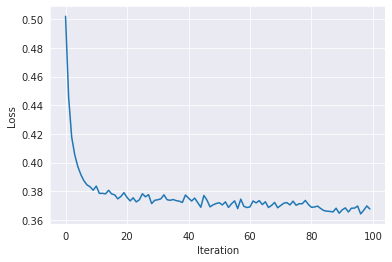

In [38]:
plt.plot(np.squeeze(loss_logs))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [56]:
tmp_accuracy = test_logistic_regression(test_x, np.reshape(test_y, (-1,1)), freqs, theta)
print(tmp_accuracy)

0.9130434782608695


In [40]:
# example
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.49831686]]
Negative sentiment


In [41]:
my_tweet =  processing()
print(my_tweet)
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')


downloading
Downloaded 1 tweets
Downloaded 1 tweets , saved to newFile.txt
 The tweet is: 
b'RT @vegsource: I am afraid COVID-19 has exposed the vaccine business for what it is: greed-driven, profit-driven, dishonest pusher of unsaf\xe2\x80\xa6'

B'RT I AM AFRAID COVID-19 HAS EXPOSED THE VACCINE BUSINESS FOR WHAT IT IS: GREED-DRIVEN, PROFIT-DRIVEN, DISHONEST PUSHER OF UNSAF\XE2\X80\XA6'
[[0.50785264]]
Positive sentiment


In [47]:
def logistic_classifier():
  my_tweet =  processing()
  print(my_tweet)
  y_hat = predict_tweet(my_tweet, freqs, theta)
  print(y_hat)
  if y_hat > 0.5:
      print('Positive sentiment')
  else: 
      print('Negative sentiment')

print("CLASSIFICATION USING LOGISTIC REGRESSION:")
logistic_classifier()

CLASSIFICATION USING LOGISTIC REGRESSION:
downloading
no more tweets found
Downloaded 0 tweets , saved to newFile.txt
 The tweet is: 


[[0.50004199]]
Positive sentiment


# **MAIN**

In [52]:
#################
# extract tweets:
# extraction()

# preprocessing:
# processing()

# naive bayes classification
# naive_classifer()

# logistic regression classifier
# logistic_classifier()

In [54]:
import time

def calling():
    for counter in range(2):
        # extraction()
        # processing()
        naive_classifier()
        print("======================================================")
        logistic_classifier()
        print("======================================================")
        print("======================================================")
        time.sleep(20)

if __name__ == "__main__":
    calling()

downloading
Downloaded 1 tweets
Downloaded 1 tweets , saved to newFile.txt
 The tweet is: 
b'RT @CNN: A growing group of people who get sick with Covid-19 never fully recover. In support groups, they sometimes refer to themselves as\xe2\x80\xa6'

CLASSIFICATION USING NAIVE BAYES
[0]
downloading
Downloaded 1 tweets
Downloaded 1 tweets , saved to newFile.txt
 The tweet is: 
b'RT @CNN: A growing group of people who get sick with Covid-19 never fully recover. In support groups, they sometimes refer to themselves as\xe2\x80\xa6'

B'RT A GROWING GROUP OF PEOPLE WHO GET SICK WITH COVID-19 NEVER FULLY RECOVER. IN SUPPORT GROUPS, THEY SOMETIMES REFER TO THEMSELVES AS\XE2\X80\XA6'
[[0.52200796]]
Positive sentiment
downloading
Downloaded 1 tweets
Downloaded 1 tweets , saved to newFile.txt
 The tweet is: 
b'RT @_ThomasRoyalty: Due to COVID-19, my company reduced our hours to 20 hours a week. I\xe2\x80\x99m a little short on cash for bills and groceries, i\xe2\x80\xa6'

CLASSIFICATION USING NAIVE B